# Deep Learning - Unibz

### Title: **Object Shape and Color Detection**

### Students: **Diaeddin Rimawi & Zeeshan Hameed**

### Professor: Prof. **Oswald Lanz**


## Introduction

In this notebook, we implement [YOLOv4](https://arxiv.org/pdf/2004.10934.pdf) to train our model, to detect objects, the color of the object, and its shape (Cylinder/Cube).

This noteboot, shows the following steps to implement YOLOv4 on our custom data:
* Set up YOLOv4 environment
* Download Our Custom Dataset via Roboflow
* Train Custom YOLOv4 detector
* Reload Custom YOLOv4 detector weights for inference


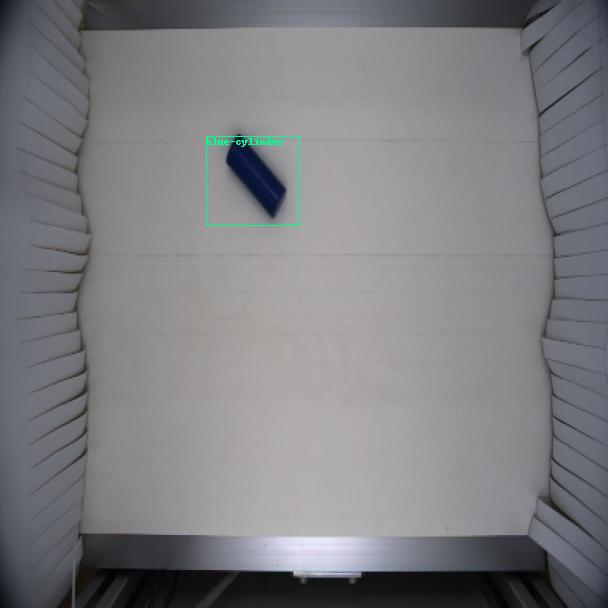



# Set up YOLOv4 Environment

In [ ]:
# !git clone https://github.com/roboflow-ai/pytorch-YOLOv4.git
%cd /content
!rm -rf pytorch-YOLOv4
!git clone https://github.com/dmrimawi/pytorch-YOLOv4-DLPro.git pytorch-YOLOv4

In [ ]:
%cd /content/pytorch-YOLOv4
!cat requirements.txt
!pip install -r requirements.txt
# This restarts the runtime--ignore any error messages
# import os
# os.kill(os.getpid(), 9)

In [ ]:
# download yolov4 weights that have already been converted to PyTorch
# !gdown --no-cookies https://drive.google.com/uc?id=1zKZstikRQVDnJprH6ZSkNNjsp1vardPo&export=download
%cd /content/pytorch-YOLOv4/cfg/
!pip install -U --no-cache-dir gdown --pre
!gdown --fuzzy --no-cookies https://drive.google.com/open?id=1wv_LiFeCRYwtpkqREPeI13-gPELBDwuJ&export=download
!ls /content/pytorch-YOLOv4/cfg/

## Prepare the Dataset

In [ ]:
%cd /content/
# Object color and shape Dataset, link: https://universe.roboflow.com/diaeddin-rimawi/objects-shapes-and-colors
!rm -f *roboflow*; rm -rf test; rm -rf train; rm -rf valid; curl -L "PasteLinkHere" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [4]:
%cp train/_annotations.txt train/train.txt
%cp train/_annotations.txt train.txt
!rm -rf data
%mkdir data
%cp valid/_annotations.txt data/val.txt
%cp train/train.txt data/train.txt
%cp valid/*.jpg train/

######################################################################################################################
# Comment the line below if you don't want to delete the old training epochs [If you want to run more than one time] #
######################################################################################################################
!rm -rf /content/checkpoints

In [5]:
def file_len(fname):
  with open(fname) as f:
    for i, l in enumerate(f):
      pass
  return i + 1

num_classes = file_len('train/_classes.txt')

In [ ]:
print(num_classes)

# Train Custom Detector

In [ ]:
#start training
#-b batch size (you should keep this low (2-4) for training to work properly)
#-s number of subdivisions in the batch, this was more relevant for the darknet framework
#-l learning rate
#-g direct training to the GPU device
#pretrained invoke the pretrained weights that we downloaded above
#classes - number of classes
#dir - where the training data is
#epoch - how long to train for [each 10 epich requires around 50 minutes to loop over the 1461 img in the DS]

!python ./pytorch-YOLOv4/train.py -b 2 -s 1 -l 0.001 -g 0 -pretrained /content/pytorch-YOLOv4/cfg/yolov4.pth -classes {num_classes} -dir ./train -epochs 50

# Load Trained Weights for Custom Detection

You can also use this to load previously saved weights!

In [ ]:
#looking at the weights that our model has saved during training
!ls checkpoints

In [20]:
#choose random test image
import os
#filter out any other file [not an image] inside the test directory
test_images = [f for f in os.listdir('test') if f.endswith('.jpg')]
import random
img_path = "test/" + random.choice(test_images);

In [ ]:
%%time
##change the epoch here to the one you would like to use for inference

!python /content/pytorch-YOLOv4/models.py {num_classes} checkpoints/Yolov4_epoch10.pth {img_path} test/_classes.txt


In [ ]:
#visualize inference
from IPython.display import Image
Image('predictions.jpg')